In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-06-25 21:47:05,279 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
import glob

In [7]:
cd1_fns = glob.glob('/artemis/readout/2016-06-22_2*scan_lo*.nc')
cd1_fns.sort()
cd1_fns = cd1_fns[:4]
print cd1_fns

['/artemis/readout/2016-06-22_215649_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-22_215734_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-22_215817_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-22_215900_scan_lo_1400.0_MHz.nc']


In [8]:
cd2_fns = glob.glob('/artemis/readout/2016-06-25*scan_lo*.nc')
cd2_fns.sort()
cd2_fns = cd2_fns[:4]
print cd2_fns

['/artemis/readout/2016-06-25_201359_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-25_201441_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-25_201522_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-25_201604_scan_lo_1400.0_MHz.nc']


In [9]:
import pandas as pd

In [10]:
def load_sweep_array(fn):
    ncf = NCFile(fn)
    sa = ncf.SweepArray0
    ncf.close()
    return sa.to_dataframe(one_sweep_per_row=False)

In [11]:
cd1_rows = [load_sweep_array(fn) for fn in cd1_fns]
df1 = pd.concat(cd1_rows,ignore_index=True)

In [12]:
cd2_rows = [load_sweep_array(fn) for fn in cd2_fns]
df2 = pd.concat(cd2_rows,ignore_index=True)

In [17]:
import time

<IPython.core.display.Javascript object>


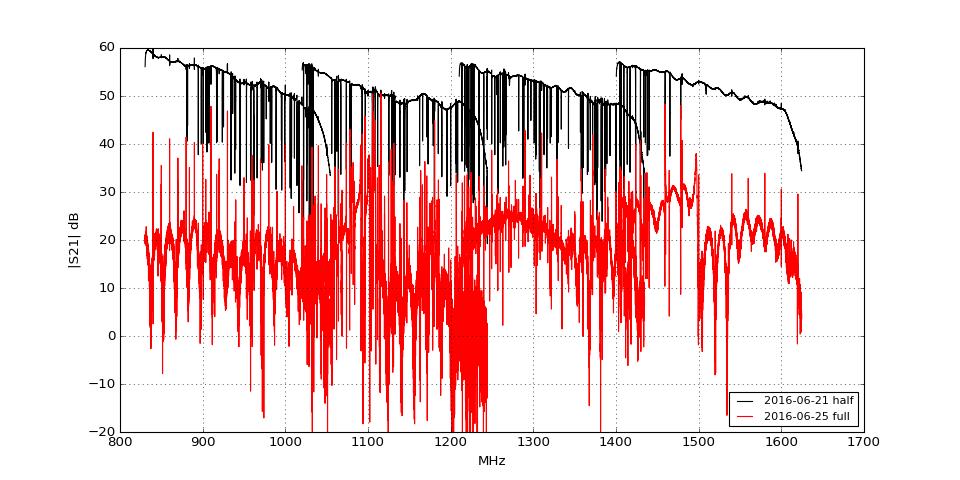

(-20, 60)

In [24]:
figure(figsize=(12,6))
for color,df,label in [('k',df1,'2016-06-21 half'),
                ('r',df2,'2016-06-25 full')]:
    for k,row in df.iterrows():
        if k > 0:
            label = None
        plot(row.frequency/1e6,dB(row.s21_point),color=color,label=label)
legend(loc='lower right',prop=dict(size='small'))
grid()
ylabel('|S21| dB')
xlabel('MHz')
ylim(-20,60)

<IPython.core.display.Javascript object>


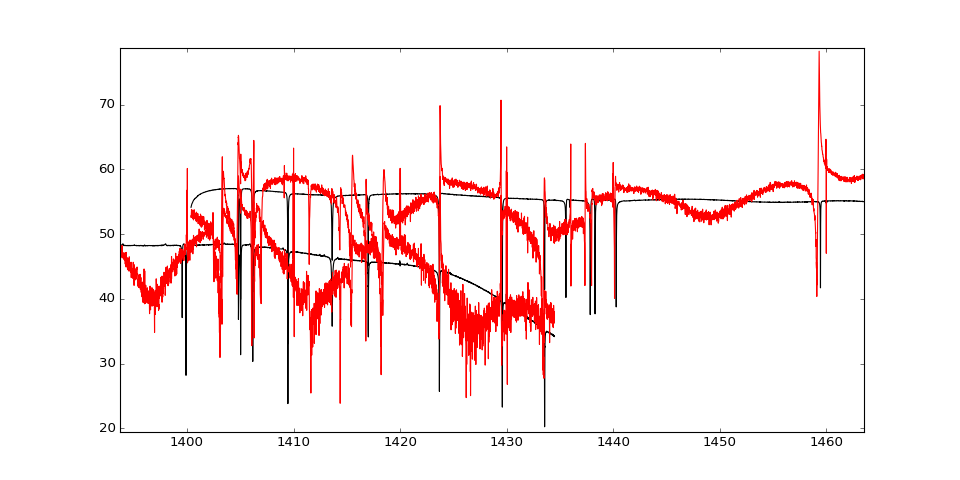

In [15]:
figure(figsize=(12,6))
for color,df,offset in [('k',df1,0),
                ('r',df2,30)]:
    for k,row in df.iterrows():
        plot(row.frequency/1e6,dB(row.s21_point)+offset,color=color)